In [1]:
import numpy as np 
import pandas as pd
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns 

## The Newton-Raphson method for numerical Analysis

The NR method is used to calculate an aproximation of the roots of function.

Newton-Raphson iterative method $\rightarrow x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$

Requiring an **initial value**: $x_{0}$

In [29]:
# Symbol instance for the variable
x = Symbol('x')

# A string as an input to convert to a mathematical expression
func_str = 'exp(x) + 4*x'

# The input function is converted to a SymPy expression
func = sympify(func_str).expand()

# Converted to a function
f = lambdify(x, func)

# compute the first derivate
df = lambdify(x, func.diff(x))

def Newton_Raphson(x_i, i):
    """## Newton Raphson Method
    Using the formula for Newton-Rapshon recursion to compute 
    the roots of a real-valued continuous and differentiable 
    function, given an initial value.

    ### Parametters
    - x_i: Short for 'x initial'. The initial value for the recursion
    to start with.

    - i: The number of iterations desired.
    """
    if i == 0:
        # The first value x_0 attatched to i=0
        print('Initial value: x_0 =', x_i)
        return x_i
    else:
        # Reduce the iteration number progresively
        i -= 1
        
        # Compute for the immediately previous value
        x_I = Newton_Raphson(x_i, i)

        # NR formula 
        x_II = x_I - (f(x_I) / df(x_I))

        # relative error
        rel_error = (abs(x_II - x_I) / abs(x_II))

        print(f'Iteration {i+1}  |  x_{i+1} = {x_II}, relative error: {round(rel_error, 6)}')
        return x_II

Newton_Raphson(-3, 10)

Initial value: x_0 = -3
Iteration 1  |  x_1 = -0.049174998613375376, relative error: 60.006611
Iteration 2  |  x_2 = -0.20170171624044334, relative error: 0.756199
Iteration 3  |  x_3 = -0.2038879493782066, relative error: 0.010723
Iteration 4  |  x_4 = -0.20388835470222624, relative error: 2e-06
Iteration 5  |  x_5 = -0.20388835470224018, relative error: 0.0
Iteration 6  |  x_6 = -0.20388835470224015, relative error: 0.0
Iteration 7  |  x_7 = -0.20388835470224018, relative error: 0.0
Iteration 8  |  x_8 = -0.20388835470224015, relative error: 0.0
Iteration 9  |  x_9 = -0.20388835470224018, relative error: 0.0
Iteration 10  |  x_10 = -0.20388835470224015, relative error: 0.0


-0.20388835470224015

Newton - Raphson modified

In [4]:
# Symbol instance for the variable
x = Symbol('x')

func_str = 'x**3 - 5*(x**2) + 8*x - 4'

# The input function is converted to a SymPy expression
func = sympify(func_str).expand()
print('Function:', func, 'its derivate:', func.diff(x))

# Converted to a function
f = lambdify(x, func)

# compute the first derivate
df = lambdify(x, func.diff(x))

df2 = lambdify(x, func.diff(x,x))

def Newton_Raphson_modified(x_i, i):
    """## Newton Raphson Method
    Using the formula for Newton-Rapshon recursion to compute 
    the roots of a real-valued continuous and differentiable 
    function, given an initial value.

    ### Parametters
    - x_i: Short for 'x initial'. The initial value for the recursion
    to start with.

    - i: The number of iterations desired.
    """
    if i == 0:
        # The first value x_0 attatched to i=0
        print('Initial value: x_0 =', x_i)
        return x_i
    else:
        i -= 1
        x_I = Newton_Raphson_modified(x_i, i)
        x_II = x_I - (f(x_I)*df(x_I))/(df(x_I)**2 - f(x_I)*df2(x_I))

        # relative error
        rel_error = (abs(x_II - x_I) / abs(x_II))

        print(f'Iteration {i+1}  |  x_{i+1} = {x_II}, relative error: {round(rel_error, 6)} %')
        return x_II

Newton_Raphson_modified(3, 10)

Function: x**3 - 5*x**2 + 8*x - 4 its derivate: 3*x**2 - 10*x + 8
Initial value: x_0 = 3
Iteration 1  |  x_1 = 1.8888888888888888, relative error: 0.588235 %
Iteration 2  |  x_2 = 1.9922480620154956, relative error: 0.051881 %
Iteration 3  |  x_3 = 1.9999694833530375, relative error: 0.003861 %
Iteration 4  |  x_4 = 1.9999999994170548, relative error: 1.5e-05 %
Iteration 5  |  x_5 = 1.9999999994170548, relative error: 0.0 %
Iteration 6  |  x_6 = 1.9999999994170548, relative error: 0.0 %
Iteration 7  |  x_7 = 1.9999999994170548, relative error: 0.0 %
Iteration 8  |  x_8 = 1.9999999994170548, relative error: 0.0 %
Iteration 9  |  x_9 = 1.9999999994170548, relative error: 0.0 %
Iteration 10  |  x_10 = 1.9999999994170548, relative error: 0.0 %


1.9999999994170548

There is some other aspects of the method that need to be included in the function. Those are goinng to be implemented in the finall packaged version of the system.

### Plotting concept

It seems interesting if the user is able to see how the method works (geometrically) to calculate the aproximation.

That would require an extra effort. For now, let's just plot the function.

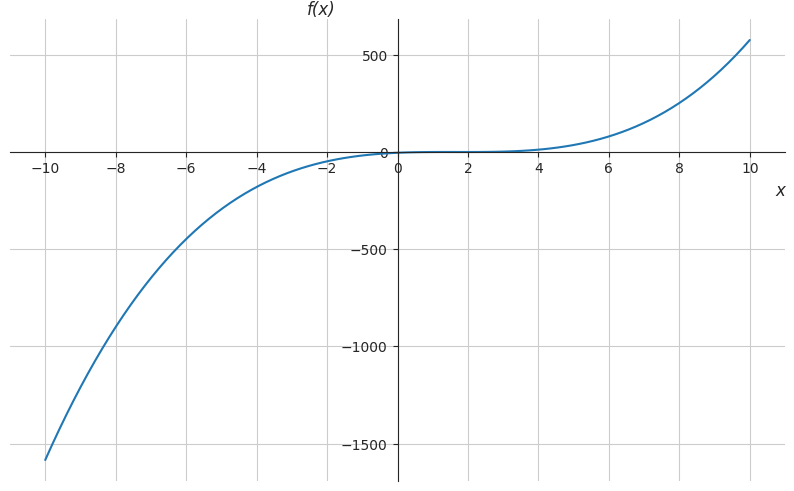

In [14]:
%matplotlib inline
sns.set_style('ticks')
# x**2 - 1 function

x = np.linspace(-10,10,100)

y = x**3 - 5*(x**2) + 8*x - 4

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# ax.plot(x,y)
ax.plot(x,f(x)) # It also works with sympy function f(x)

# To get a "text book" look: relocate the spines of the figure
ax.spines[["left", "bottom"]].set_position('zero')
ax.spines[["top", "right"]].set_visible(False)

ax.set_xticks(np.arange(-10,12,2)) # modify the xticks

# setting the name of x and y axis
ax.set_xlabel('x', loc='right', fontstyle='italic', fontsize='large')
ax.set_ylabel('f(x)', loc='top', fontstyle='italic', fontsize='large', rotation='horizontal')
ax.grid(True, which='both') # plotting a grid

In [31]:
def text_book_chart(func:Function):
    x = np.linspace(-10,10,100)

    # Plot
    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(x,func(x)) # It also works with sympy function f(x)

    # To get a "text book" look: relocate the spines of the figure
    ax.spines[["left", "bottom"]].set_position('zero')
    ax.spines[["top", "right"]].set_visible(False)

    ax.set_xticks(np.arange(-10,12,2)) # modify the xticks

    # setting the name of x and y axis
    ax.set_xlabel('x', loc='right', fontstyle='italic', fontsize='large')
    ax.set_ylabel('f(x)', loc='top', fontstyle='italic', fontsize='large', rotation='horizontal')
    ax.grid(True, which='both') # plotting a grid
    
    # plt.show()
    return fig

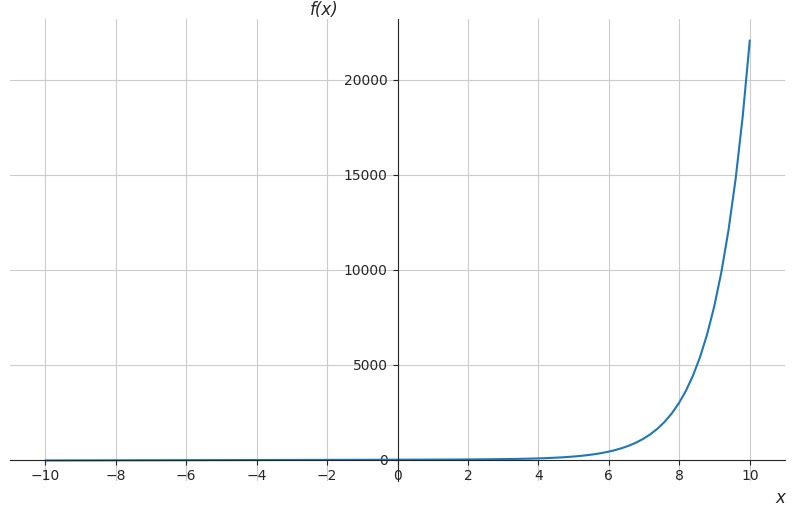

In [30]:
figure = text_book_chart(f)